Weather stations after Alberta + bounds filter: 651
rainbow length 311


/tmp/ipykernel_23548/1709739149.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gist_ncar', n)


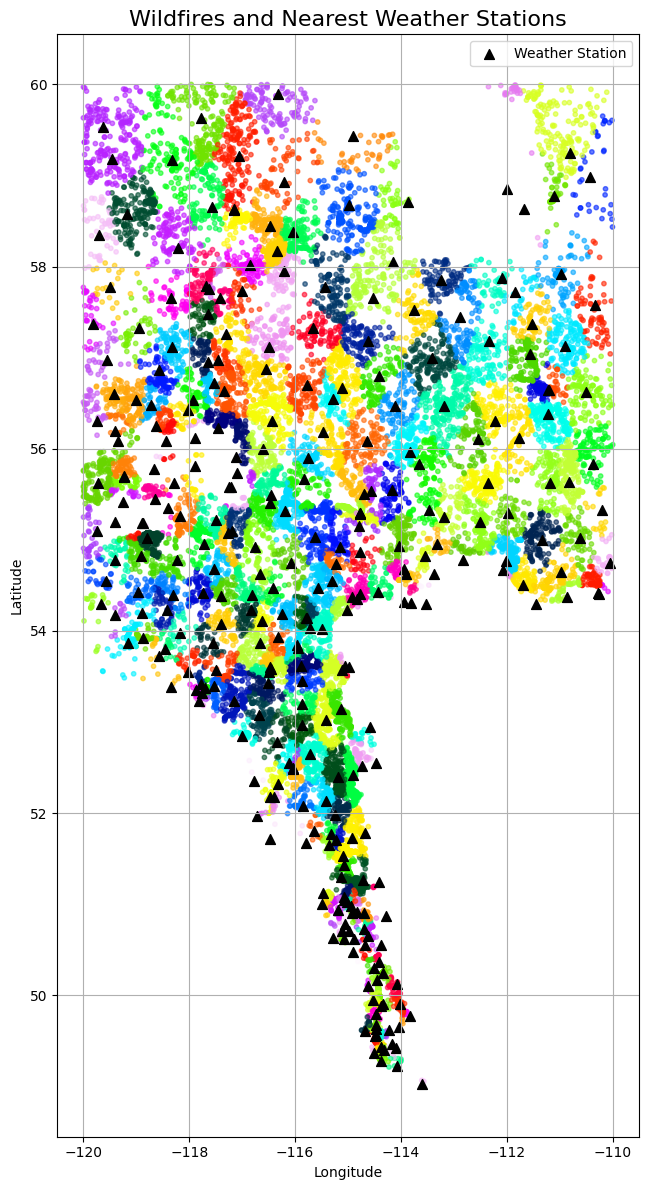

In [4]:
# Re-import required libraries after code execution environment reset
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.cm as cm
import matplotlib.colors as mcolors

alberta_bounds = {
    "lat_min": 48.9,
    "lat_max": 60.0,
    "lon_min": -120.0,
    "lon_max": -110.0
}


# Define the class again
class WildfireWeatherAnalysis:
    def __init__(self, wildfire_file, weather_file):
        self.wildfire_file = wildfire_file
        self.weather_file = weather_file
        self.df = None
        self.clustered_gdf = None
        self.weather_gdf = None

    def load_data(self):
        # Load wildfire data
        if self.wildfire_file.endswith('.xlsx'):
            excel_file = pd.ExcelFile(self.wildfire_file)
            self.df = pd.read_excel(excel_file, sheet_name="2006-2024")
        elif self.wildfire_file.endswith('.csv'):
            self.df = pd.read_csv(self.wildfire_file)
        else:
            raise ValueError("Unsupported wildfire file format")

        # Load weather station data
        weather_df = pd.read_csv(self.weather_file, skiprows=0, quotechar='"')

        weather_df = weather_df[weather_df["Province"].str.upper() == "ALBERTA"]

        # Analyze

        import numpy as np

        # Ensure types match
        weather_df["Station ID"] = weather_df["Station ID"].astype(str)
        kept = ['1977', '48550', '8884', '2823', '48949', '2586', '46827', '10225', '2511', '2613', '51497', '27031', '2663', '41785', '51377', '2605', '2553', '51500', '50920', '27652', '2767', '30726', '2693', '10864', '1805', '2770', '2797', '2471', '2502', '10105', '2479', '2788', '2704', '27212', '46447', '27037', '32455', '2402', '2173', '42727', '43151', '53998', '8893', '2416', '42443', '8838', '2323', '26888', '46910', '9010', '32333', '2745', '2750', '2732', '1823', '27713', '1984', '2395', '2685', '2301', '52258', '2593', '50757', '2489', '2102', '27219', '55538', '27825', '45887', '2656', '43581', '10689', '8924', '6853', '53078', '53100', '2570', '8824', '27455', '47090', '2407', '2578', '2562', '50149', '47748', '8819', '47073', '50940', '2604', '1898', '47147', '27261', '31027', '2368', '42726', '46127', '2339', '27655', '2564', '2460', '46847', '32394', '2677', '2134', '2517', '32255', '51498', '46132', '51578', '1920', '1953', '2722', '1825', '2626', '27715', '10907', '51858', '2690', '51422', '1896', '53098', '27041', '2001', '32149', '50622', '2092', '8804', '2764', '2700', '46811', '2431', '2169', '27658', '8857', '2454', '53999', '2409', '46787', '2657', '50937', '27828', '1884', '2556', '44266', '43147', '51838', '32256', '1839', '2274', '55338', '27213', '46851', '55018', '31608', '2423', '50129', '2086', '2814', '2596', '51444', '42728', '54358', '45748', '45927', '8859', '47107', '2377', '32253', '31411', '31447', '50939', '32454', '2072', '2694', '46849', '31409', '46729', '2648', '1814', '2432', '2519', '8918', '50922', '2224', '2103', '47068', '2795', '2635', '45767', '2050', '2528', '45907', '1881', '8712', '30643', '41784', '2405', '2273', '8830', '46467', '2621', '9609', '10708', '2231', '2765', '2829', '50918', '50921', '31427', '32458', '2538', '31468', '6860', '2731', '2737', '43783', '47089', '2542', '2832', '27650', '42731', '2790', '2590', '2144', '50623', '1799', '2624', '30495', '46468', '2386', '2594', '1967', '8837', '2778', '1835', '47076', '46128', '2440', '53738', '32456', '47087', '2601', '2113', '2746', '1812', '2016', '2597', '1857', '47070', '2457', '46914', '32274', '46130', '46129', '8872', '2025', '2174', '50128', '30641', '2809', '2482', '50028', '30543', '2347', '2500', '54478', '47108', '1935', '10104', '47071', '1915', '8900', '29926', '46807', '2813', '2680', '47128', '2819', '49949', '2400', '30055', '53099', '51499', '2666', '49968', '10906', '42724', '2108', '2655', '2461', '49268', '2567', '42703', '27653', '2392', '2668', '46852', '49490', '31207', '46913', '27492', '2112', '2425', '31089', '2263', '2467', '8917', '2503', '46810', '2523', '2504', '55419', '53718', '2312', '2632', '2573', '46734', '47747', '2654', '31408', '41757', '2276', '49048', '46470', '2017', '51840', '46912', '2689', '2757', '50311', '8753', '2150', '2515', '2255', '2485', '46927', '53918', '2462', '2141', '2258', '2219', '50917', '43150', '2803', '52982', '9015', '46867', '2429', '10222', '2658', '1801', '47077', '2068', '2459', '45727', '2411', '27656', '2684', '9611', '32231', '2492', '46469', '10725', '46327', '2227', '27216', '27295', '2712', '1822', '44746', '10665', '50938', '32459', '32232', '46848', '45947', '10915', '26971', '2438', '8895', '46131', '42729', '32257', '43148', '47047', '2634', '2721', '2821', '55418', '2171', '8723', '43580', '43363', '49369', '30310', '45847', '47767', '2122', '51898', '2521', '2510', '2675', '2783', '2782', '2539', '31410', '51501', '2366', '43164', '46732', '46808', '2755', '48948', '30669', '2762', '2239', '46907', '31412', '45749', '2375', '32313', '53198', '2628', '2718', '2572', '2794', '27200', '2641', '27214', '2735', '10930', '45647', '30907', '27793', '1904', '49948', '27260', '47110', '1990', '2205', '42730', '2481', '46850', '45867', '2701', '2513', '2804', '2673', '46767', '2667', '43561', '41783', '2452', '2811', '2404', '50777', '10223', '27030', '27029', '2363', '47075', '48975', '2761', '42283', '2736', '1868', '27262', '2800', '27217', '2719', '2078', '27716', '2592', '2120', '45948', '27845', '29633', '2379', '10700', '2332', '2140', '10928', '10793', '8791', '32395', '8856', '43149', '42164', '2247', '49368', '30347', '46887', '9410', '47072', '46730', '2493', '2218', '1865', '31588', '2486', '2614', '46731', '2279', '2537', '1958', '2674', '45747', '42163', '31469', '2295', '8916', '2410', '2393', '52358', '32273', '52200', '46909', '1828', '2793', '31288', '46471', '46809', '1848', '26870', '27040', '1815', '2315', '9604', '47067', '51841', '2781', '2639', '10183', '1859', '51440', '10693', '47074', '54718', '32461', '27038', '1873', '49928', '54000', '42725', '27036', '50919', '2180', '27018', '46928', '48468', '8825', '47069', '10889', '47727', '52459', '8915', '1886', '2084', '46908', '55478', '10932', '10691', '27211', '47787', '29573', '49050', '2265', '27378', '32460', '8920', '2508', '31528', '31414', '10978', '1872', '30433', '2580', '2123', '2830', '46911', '6865', '1974', '1870', '27199', '50923', '2650', '2622', '8724', '2577', '2145', '49049', '2726', '2490', '43560', '27657', '2545', '47088', '31413', '51839', '51899', '32453', '2739', '2133', '27218', '53358', '46733', '27263', '1829', '51758', '9610', '6854', '2501', '31407', '32230', '52458', '32457', '8919', '2779', '10690', '2396', '1843', '9608', '42723', '26850', '47109', '2561', '47127', '2818', '6863', '2417', '1840', '46812', '2649', '31198', '2806', '52478', '50430', '2543', '10890', '2544', '8855', '27654', '55118', '9436', '2740', '55098', '27331', '51502', '32254', '46853', '8851', '2365', '2522', '32433', '8914']
        weather_df = weather_df[weather_df['Station ID'].astype(str).isin(kept)]

        weather_df = weather_df.dropna(subset=["Latitude (Decimal Degrees)", "Longitude (Decimal Degrees)"])
        weather_df = weather_df[
            (weather_df["Province"].str.upper() == "ALBERTA") &
            (weather_df["Latitude (Decimal Degrees)"].between(alberta_bounds["lat_min"], alberta_bounds["lat_max"])) &
            (weather_df["Longitude (Decimal Degrees)"].between(alberta_bounds["lon_min"], alberta_bounds["lon_max"]))
        ]
        print("Weather stations after Alberta + bounds filter:", len(weather_df))


        self.weather_gdf = gpd.GeoDataFrame(
            weather_df,
            geometry=gpd.points_from_xy(weather_df["Longitude (Decimal Degrees)"], weather_df["Latitude (Decimal Degrees)"]),
            crs="EPSG:4326"
        )

        self.cluster_wildfires_analyze()

        self.weather_gdf = self.weather_gdf[self.weather_gdf["Station ID"].isin(self.df["Station ID"].to_list())]

        # self.weather_gdf = gpd.GeoDataFrame(
        #     weather_df,
        #     geometry=gpd.points_from_xy(weather_df["Longitude (Decimal Degrees)"], weather_df["Latitude (Decimal Degrees)"]),
        #     crs="EPSG:4326"
        # )



    def cluster_wildfires(self, n_clusters=100):
        coords = self.df[['LATITUDE', 'LONGITUDE']].dropna()
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        coords['CLUSTER'] = kmeans.fit_predict(coords)
        
        self.clustered_gdf = gpd.GeoDataFrame(
            coords,
            geometry=gpd.points_from_xy(coords['LONGITUDE'], coords['LATITUDE']),
            crs="EPSG:4326"
        )

    # def plot_clusters(self):
    #     fig, ax = plt.subplots(figsize=(15, 12))
    #     self.clustered_gdf.plot(ax=ax, column='CLUSTER', categorical=True, legend=False, markersize=10, alpha=0.6)
    #     ax.set_title("KMeans Clustering of Wildfire Locations (100 Clusters)", fontsize=16)
    #     ax.set_xlabel("Longitude")
    #     ax.set_ylabel("Latitude")
    #     plt.grid(True)
    #     plt.tight_layout()
    #     plt.show()

    def plot_clusters_with_weather(self):
        fig, ax = plt.subplots(figsize=(15, 12))

        # Use same color mapping logic
        station_ids = self.clustered_gdf['Station ID'].astype(str).unique()
        n = len(station_ids)
        print("rainbow length", n)
        cmap = cm.get_cmap('gist_ncar', n)
        color_map = {station: mcolors.rgb2hex(cmap(i)) for i, station in enumerate(station_ids)}
        self.clustered_gdf['color'] = self.clustered_gdf['Station ID'].astype(str).map(color_map)

        self.clustered_gdf.plot(ax=ax, color=self.clustered_gdf['color'], markersize=10, alpha=0.6)
        self.weather_gdf.plot(ax=ax, color='black', marker='^', label='Weather Station', markersize=50)

        ax.set_title("Wildfires and Nearest Weather Stations", fontsize=16)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        ax.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


    def cluster_wildfires_analyze(self):
        # Ensure wildfire locations are valid
        wildfire_coords = self.df[['LATITUDE', 'LONGITUDE']].dropna().copy()
        
        # Get weather station coordinates and their Station IDs
        weather_coords = self.weather_gdf[['Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)']].to_numpy()
        station_ids = self.weather_gdf['Station ID'].to_numpy()
        
        # Wildfire coordinates
        fire_coords = wildfire_coords[['LATITUDE', 'LONGITUDE']].to_numpy()
        
        # Find closest weather station index and distances
        closest_indices, _ = pairwise_distances_argmin_min(fire_coords, weather_coords)

        # Map each wildfire to its nearest station ID
        wildfire_coords['Station ID'] = station_ids[closest_indices]
        
        # Merge the cluster assignment back into original df
        self.df = self.df.merge(wildfire_coords[['LATITUDE', 'LONGITUDE', 'Station ID']], 
                                on=['LATITUDE', 'LONGITUDE'], 
                                how='left')
        
        # Create GeoDataFrame for plotting
        self.clustered_gdf = gpd.GeoDataFrame(
            wildfire_coords,
            geometry=gpd.points_from_xy(wildfire_coords['LONGITUDE'], wildfire_coords['LATITUDE']),
            crs="EPSG:4326"
        )



# Instantiate and run the analysis
analysis = WildfireWeatherAnalysis(
    wildfire_file="fp-historical-wildfire-data-2006-2024.csv",
    weather_file="StationInventoryEN.csv"
)
analysis.load_data()

# analysis.plot_clusters_with_weather()
analysis.plot_clusters_with_weather()


### Get Nearest Output